# Análisis Exploratorio de Datos


## Importacion de librerias


In [2]:
import os
import numpy as np
import pandas as pd


## Cargar datos


In [3]:
data = pd.read_csv("merged_songs.csv")
print(data.info())

print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62125 entries, 0 to 62124
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             62125 non-null  object 
 1   artist_name       62125 non-null  object 
 2   track_name        62125 non-null  object 
 3   track_id          62125 non-null  object 
 4   popularity        62125 non-null  int64  
 5   acousticness      62125 non-null  float64
 6   danceability      62125 non-null  float64
 7   duration_ms       62125 non-null  int64  
 8   energy            62125 non-null  float64
 9   instrumentalness  62125 non-null  float64
 10  key               62125 non-null  object 
 11  liveness          62125 non-null  float64
 12  loudness          62125 non-null  float64
 13  mode              62125 non-null  object 
 14  speechiness       62125 non-null  float64
 15  tempo             62125 non-null  float64
 16  time_signature    62125 non-null  object

- genre: Género musical de la canción.
- artist_name: Nombre del artista.
- track_name: Nombre de la canción.
- track_id: Identificador único de la canción.
- popularity: Popularidad de la canción (valor numérico).
- acousticness: Medida de cuán acústica es la canción.
- danceability: Facilidad para bailar la canción.
- duration_ms: Duración de la canción en milisegundos.
- energy: Nivel de energía de la canción.
- instrumentalness: Probabilidad de que la canción sea instrumental.
- key: Tono musical de la canción.
- liveness: Presencia de público en la grabación.
- loudness: Volumen general de la canción (en decibelios).
- mode: Modo musical (mayor o menor).
- speechiness: Presencia de palabras habladas en la canción.
- tempo: Tempo de la canción (en BPM).
- time_signature: Compás de la canción.
- valence: Medida de positividad o felicidad transmitida por la canción.


## Limpieza de datos


In [4]:
# Eliminar filas con valores nulos en el DataFrame
data = data.dropna()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62125 entries, 0 to 62124
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             62125 non-null  object 
 1   artist_name       62125 non-null  object 
 2   track_name        62125 non-null  object 
 3   track_id          62125 non-null  object 
 4   popularity        62125 non-null  int64  
 5   acousticness      62125 non-null  float64
 6   danceability      62125 non-null  float64
 7   duration_ms       62125 non-null  int64  
 8   energy            62125 non-null  float64
 9   instrumentalness  62125 non-null  float64
 10  key               62125 non-null  object 
 11  liveness          62125 non-null  float64
 12  loudness          62125 non-null  float64
 13  mode              62125 non-null  object 
 14  speechiness       62125 non-null  float64
 15  tempo             62125 non-null  float64
 16  time_signature    62125 non-null  object

### Estadisticas


In [5]:
# Mostrar estadísticas descriptivas para las variables numéricas
display(data.describe())

# Mostrar estadísticas para variables categóricas
display(data.describe(include=['object']))

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,release_year
count,62125.000000,62125.000000,62125.000000,6.212500e+04,62125.000000,62125.000000,62125.000000,62125.000000,62125.000000,62125.000000,62125.000000,62125.000000
mean,55.062374,0.270324,0.578539,2.409130e+05,0.616877,0.080170,0.190730,-8.365366,0.088992,119.632683,0.503805,2000.633433
std,12.151074,0.301149,0.164998,8.236760e+04,0.231308,0.221281,0.158646,4.652784,0.100767,29.742396,0.243814,15.959245
min,0.000000,0.000001,0.059400,3.008000e+04,0.000707,0.000000,0.009670,-47.046000,0.022400,31.988000,0.022200,1923.000000
25%,47.000000,0.022400,0.472000,1.968670e+05,0.464000,0.000000,0.095000,-10.244000,0.034600,95.731000,0.311000,1993.000000
50%,56.000000,0.137000,0.587000,2.291330e+05,0.645000,0.000018,0.126000,-7.207000,0.047000,118.005000,0.504000,2006.000000
75%,63.000000,0.453000,0.697000,2.690000e+05,0.803000,0.004310,0.239000,-5.234000,0.091600,139.698000,0.697000,2013.000000
max,99.000000,0.996000,0.986000,3.650688e+06,0.998000,0.999000,1.000000,3.744000,0.960000,242.903000,0.991000,2019.000000


,genre,artist_name,track_name,track_id,key,mode,time_signature
count,62125,62125,62125,62125,62125,62125,62125
unique,26,6259,31302,34530,12,2,5
top,Rock,Drake,Home,6AIte2Iej1QKlaofpjCzW1,C,Major,4/4
freq,6532,396,39,8,7320,41444,56848


## Visualización


### Correlación

Gráfico de la correlación de Pearson de cada variable respecto a la popularidad


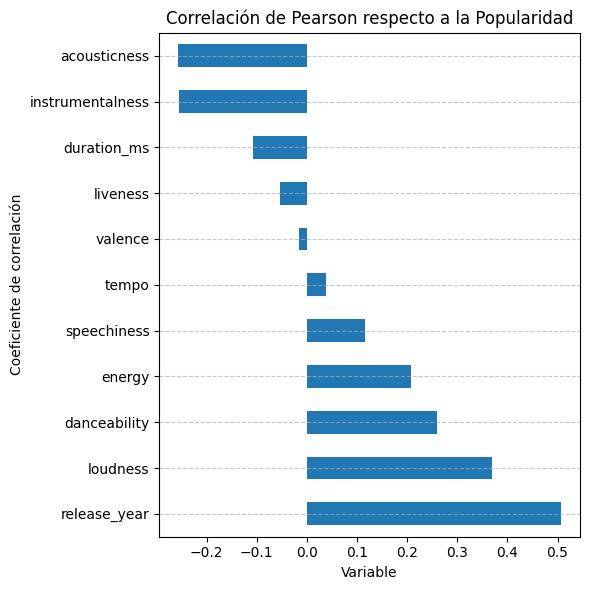

In [6]:
import matplotlib.pyplot as plt

# Calcular la correlación de Pearson de cada variable numérica respecto a 'popularity'
correlations = data.corr(numeric_only=True)['popularity'].sort_values(ascending=False)

# Excluir la autocorrelación
correlations = correlations.drop('popularity')

# Graficar las correlaciones
plt.figure(figsize=(6, 6))
correlations.plot(kind='barh')
plt.title('Correlación de Pearson respecto a la Popularidad')
plt.ylabel('Coeficiente de correlación')
plt.xlabel('Variable')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Cantidad de canciones por década


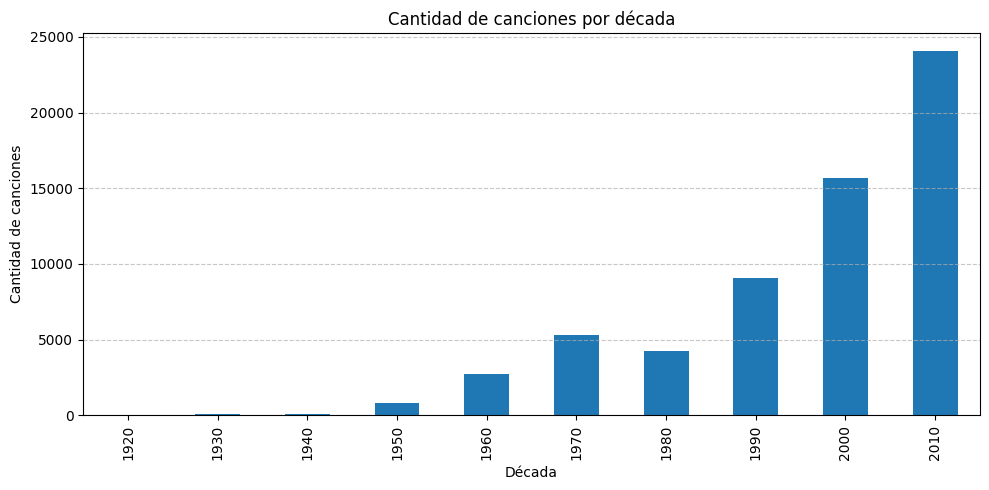

In [7]:
# Extraer el año desde el track_id si está codificado, pero normalmente no lo está.
# Si hay una columna de año, úsala. Si no, intentemos extraer el año del nombre de la canción o artista (no recomendado).
# Supongamos que hay una columna 'release_year' (si no, esto dará error y se debe ajustar según los datos reales).

if 'release_year' in data.columns:
    canciones_por_anio = data['release_year'].value_counts().sort_index()
    
    # Agrupar la cantidad de canciones por década
    decadas = (canciones_por_anio.index // 10) * 10
    canciones_por_decada = canciones_por_anio.groupby(decadas).sum()

    plt.figure(figsize=(10, 5))
    canciones_por_decada.plot(kind='bar')
    plt.title('Cantidad de canciones por década')
    plt.xlabel('Década')
    plt.ylabel('Cantidad de canciones')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No existe una columna 'release_year' en el DataFrame.")

In [8]:
# Graficar el promedio de varias características de sonido por año
import plotly.express as px
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
if 'release_year' in data.columns:
    df_avg = data.groupby('release_year')[sound_features].mean().reset_index()
    fig = px.line(
        df_avg,
        x='release_year',
        y=sound_features,
        markers=True,
        width=1000,
        height=600,
        color_discrete_sequence=px.colors.qualitative.Set1
    )
    fig.update_layout(
        title='Promedio de características de sonido por año',
        xaxis_title='Año',
        yaxis_title='Valor promedio',
        legend_title='Característica',
        template='plotly_white'
    )
    fig.show()
else:
    print("No existe una columna 'year' en el DataFrame.")

In [9]:
# Mostrar los 10 géneros más populares y sus características promedio
# Mostrar los 10 géneros más populares y sus características promedio
import plotly.express as px

data_by_genres = pd.read_csv("merged_songs.csv")

if 'genre' in data_by_genres.columns:
    # Agrupar por género y calcular el promedio de las características relevantes
    genre_data = data_by_genres.groupby('genre')[['popularity', 'valence', 'energy', 'danceability', 'acousticness']].mean().reset_index()
    # Seleccionar los 10 géneros con mayor popularidad promedio
    top10_genres = genre_data.nlargest(10, 'popularity')
    # Graficar las características promedio de los 10 géneros más populares
    fig = px.bar(
        top10_genres,
        x='genre',
        y=['valence', 'energy', 'danceability', 'acousticness'],
        barmode='group',
        title='Top 10 géneros más populares y sus características promedio'
    )
    fig.update_layout(
        xaxis_title='Género',
        yaxis_title='Valor promedio',
        legend_title='Característica',
        template='plotly_white'
    )
    fig.show()
else:
    print("No existe una columna 'genres'")

# Creacion del modelo


## Similitud por K neighbors


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances

# Seleccionar características numéricas relevantes
features = [
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'valence', 'tempo'
]

# Separar datos en train y test para evaluación
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data[features])
X_test = scaler.transform(test_data[features])

# Crear y ajustar el modelo KNN
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(X_train)

,n_neighbors,5
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'euclidean'
,p,2
,metric_params,None
,n_jobs,None


In [11]:
# Evaluar el modelo usando solo la distancia euclidiana promedio entre cada canción de test y su recomendada
distancias = []

for i, row in test_data.iterrows():
    # Obtener el vector de la canción de test como DataFrame para mantener los nombres de columnas
    test_vector = scaler.transform(pd.DataFrame([row[features]], columns=features))
    distances_knn, indices = knn.kneighbors(test_vector)
    similar_idx = indices[0][0]  # El más cercano en train_data
    # Guardar la distancia euclidiana
    distancias.append(distances_knn[0][0])

distancia_media = np.mean(distancias) if distancias else 0
print(f"Distancia euclidiana promedio entre test y recomendación: {distancia_media:.4f}")

Distancia euclidiana promedio entre test y recomendación: 0.2339


In [13]:
from sklearn.metrics import ndcg_score

k = 10
precisiones = []
recalls = []
average_precisions = []
ndcgs = []

for i, row in test_data.iterrows():
    test_vector = scaler.transform(pd.DataFrame([row[features]], columns=features))
    # Calcular distancias a todo el set de entrenamiento
    dists = np.linalg.norm(X_train - test_vector, axis=1)
    # Ordenar índices por distancia (de menor a mayor)
    sorted_idx = np.argsort(dists)
    # Definir las k canciones más cercanas como relevantes
    relevancias = np.zeros(len(train_data))
    relevancias[sorted_idx[:k]] = 1
    # Obtener las k recomendaciones del modelo
    distances_knn, indices = knn.kneighbors(test_vector, n_neighbors=k)
    recommended_idx = indices[0]
    # Relevancia de las recomendaciones
    recommended_relevancias = relevancias[recommended_idx]
    num_relevantes = k  # Por definición, hay k relevantes
    # Precisión@k
    precision = np.sum(recommended_relevancias) / k
    precisiones.append(precision)
    # Recall@k
    recall = np.sum(recommended_relevancias) / num_relevantes if num_relevantes > 0 else 0
    recalls.append(recall)
    # MAP
    if np.sum(recommended_relevancias) > 0:
        ap = 0
        hits = 0
        for idx, rel in enumerate(recommended_relevancias, 1):
            if rel:
                hits += 1
                ap += hits / idx
        ap /= np.sum(recommended_relevancias)
    else:
        ap = 0
    average_precisions.append(ap)
    # NDCG
    ndcg = ndcg_score([relevancias[recommended_idx]], [1 - distances_knn[0]])
    ndcgs.append(ndcg)

print(f"Precisión@{k}: {np.mean(precisiones):.4f}")
print(f"Recall@{k}: {np.mean(recalls):.4f}")
print(f"MAP: {np.mean(average_precisions):.4f}")
print(f"NDCG@{k}: {np.mean(ndcgs):.4f}")

Precisión@10: 0.9731
Recall@10: 0.9731
MAP: 0.9991
NDCG@10: 0.9998


# Similitud con Clustering Kmeans
